<h2>
    A/B testing
</h2>

<h3>Format: </h3><p> A data frame with 5 variables:</p>

<ul>
  <li>user_id</li>
  <li>timestamp</li>
  <li>group - control or treatment</li>
  <li>landing_page - old_page or new_page</li>
  <li>converted - 0 or 1</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats.api as sms
from statsmodels. stats.weightstats import ztest as ztest

In [2]:
df = pd.read_csv('C:/Users/Максим/Desktop/Statistics/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
(df.groupby(['group'])
 .agg({'group' : 'count',
       'converted' : ['sum', 'mean']})
 .rename(columns={'count':'Sample size',
                 'sum' : 'Number of conversions',
                 'mean' : 'Conversion'})
)

group             converted           
          Sample size Number of conversions Conversion
group                                                 
control        147202                 17723   0.120399
treatment      147276                 17514   0.118920

<h3>Data Cleaning</h3>
<p>
Removing rows where users in the control group saw the new version of the site and removing rows where the treatment group saw the old version of the site.
</p>

In [4]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [5]:
df[(df['group']=='control') & (df['landing_page']=='new_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [6]:
df[df['user_id']==767017]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
277989,767017,2017-01-08 01:31:31.456648,treatment,new_page,0


In [7]:
df[(df['group']=='treatment') & (df['landing_page']=='old_page')]

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [8]:
df[df['user_id']==892498]

,user_id,timestamp,group,landing_page,converted
167331,892498,2017-01-14 05:48:18.985482,control,old_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0


In [9]:
df = df.drop(df[(df['group']=='control') & (df['landing_page']=='new_page')].index)
df = df.drop(df[(df['group']=='treatment') & (df['landing_page']=='old_page')].index)

In [10]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [11]:
df['user_id'].count()

290585

In [12]:
df['user_id'].nunique()

290584

In [13]:
df.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

In [14]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [15]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp']).dt.date

In [16]:
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
date                    object
dtype: object

In [17]:
df.head()

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


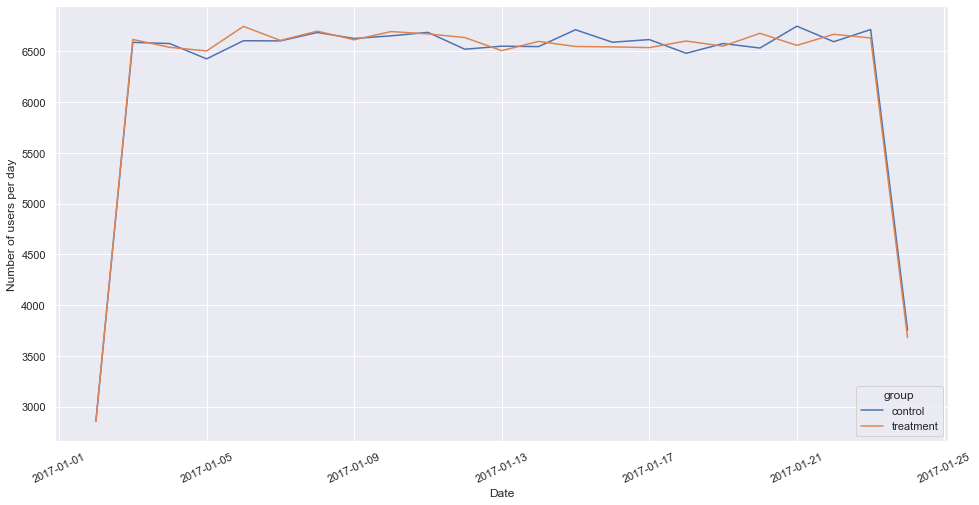

In [18]:
data = df.groupby(['date','group']).agg({'user_id' : 'count'})

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(data=data, x="date", y="user_id", hue="group")
plt.xticks(rotation=25)
plt.ylabel('Number of users per day')
plt.xlabel('Date')
plt.show()

<h3>Sample size</h3>

In [19]:
sample_size = int(sms.NormalIndPower().solve_power(
                        sms.proportion_effectsize(0.12, 0.14), 
                        power=0.8,
                        alpha=0.01))
print(sample_size)

6595


In [20]:
control_group = df[df['group']=='control'].sample(sample_size)
treatment_group = df[df['group']=='treatment'].sample(sample_size)

print(control_group.shape[0], treatment_group.shape[0] )

6595 6595


In [21]:
ab = pd.concat([control_group, treatment_group], axis=0, ignore_index=True, sort=False)
ab

,user_id,timestamp,group,landing_page,converted,date
0,675954,2017-01-03 09:44:16.179113,control,old_page,0,2017-01-03
1,771010,2017-01-04 02:35:38.607042,control,old_page,0,2017-01-04
2,653323,2017-01-18 05:23:21.944581,control,old_page,0,2017-01-18
3,888927,2017-01-03 06:55:35.448250,control,old_page,0,2017-01-03
4,942783,2017-01-12 06:30:27.140164,control,old_page,0,2017-01-12
...,...,...,...,...,...,...
13185,678090,2017-01-05 20:06:36.482765,treatment,new_page,1,2017-01-05
13186,659029,2017-01-09 14:54:08.257969,treatment,new_page,0,2017-01-09
13187,883824,2017-01-04 13:52:34.284973,treatment,new_page,0,2017-01-04
13188,657411,2017-01-11 10:17:22.894491,treatment,new_page,1,2017-01-11


In [22]:
(ab.groupby(['group'])
 .agg({'group' : 'count',
       'converted' : ['sum', 'mean']})
 .rename(columns={'count':'Sample size',
                 'sum' : 'Number of conversions',
                 'mean' : 'Conversion'})
)

group             converted           
          Sample size Number of conversions Conversion
group                                                 
control          6595                   775   0.117513
treatment        6595                   790   0.119788

<h3>AA Test</h3>

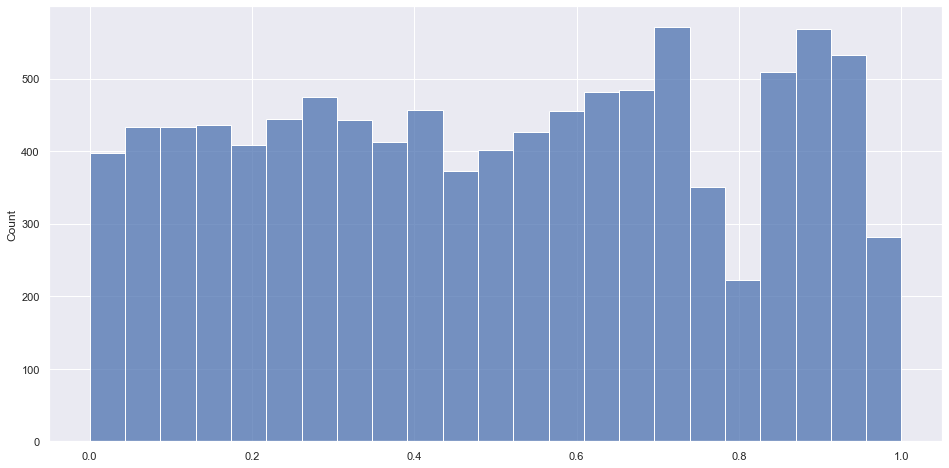

In [23]:
p_val = []

for i in range(10000): 
    sample1 = ab[ab.group == 'control'].converted.sample(1000, replace = True).values
    sample2 = ab[ab.group == 'control'].converted.sample(1000, replace = True).values
    p_val.append(ztest(sample1, sample2, value= 0)[1]) 

sns.histplot(p_val)
plt.show()

In [24]:
sum(np.array(p_val) < 0.05) / 10000 * 100

4.65

<p>
We can conclude from the AA test that our split system works correctly, since the percentage of p-values that turned out to be less than or equal to 0.05.
</p>

<h3>99% Confidence interval</h3>

In [25]:
conf_cont = st.t.interval(alpha=0.99,
              df=len(df)-1,
              loc=np.mean(ab[ab['group']=='control']['converted']),
              scale=st.sem(ab[ab['group']=='control']['converted'])) 
print(conf_cont)

(0.10729815863948586, 0.12772837661449443)


In [26]:
conf_treat = st.t.interval(alpha=0.99,
              df=len(df)-1,
              loc=np.mean(ab[ab['group']=='treatment']['converted']),
              scale=st.sem(ab[ab['group']=='treatment']['converted'])) 
print(conf_treat)

(0.10948752600430688, 0.13008790993200853)


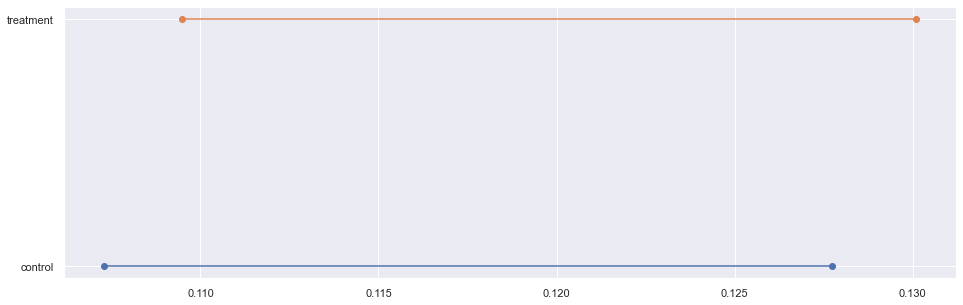

In [27]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,5)})
data_dict = {}
data_dict['lower'] = [conf_cont[0],conf_treat[0]]
data_dict['upper'] = [conf_cont[1],conf_treat[1]]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'o-')
plt.yticks(range(len(dataset)), ['control','treatment'])

plt.show()

<ul>
  <li>99% Confidence interval for control group: [0.107, 0.127]</li>
  <li>99% Confidence interval for treatment group: [0.109, 0.130]</li>
</ul>

<h3>Ztest</h3>
<ul>
  <li>Null hypotheses: Conversion rate of groups A and B are the same</li>
  <li>Alternative hypotheses: Conversion rate of groups A and B aren't the same</li>
</ul>


In [28]:
ztest(ab[ab['group']=='control']['converted'],
      ab[ab['group']=='treatment']['converted'],
      value= 0) 

(-0.40385899677558956, 0.6863164098198435)

<p>
The test statistic for a single sample z-test is -0.403 and the corresponding p-value is 0.686.
</p>
<p>
Since this p-value is greater than 0.05, we don't have enough evidence to reject the null hypothesis.
</p>
Conclusion: Groups A and B are not significantly different
  

<h3>
    Chi-square independence test 
</h3>

<p>
    to determine if there is a significant relationship between two categorical variables.
</p>

<ul>
  <li>Null hypotheses: There is no relationship between groups and conversion rate.</li>
  <li>Alternative hypotheses: There is a relationship between groups and conversion rate</li>
</ul>

In [29]:
pd.crosstab(index=ab['group'], columns=ab['converted'])

converted,0,1
group,,
control,5820,775
treatment,5805,790


In [30]:
ch = st.chi2_contingency(pd.crosstab(index=ab['group'], columns=ab['converted']),correction=False)
ch
print(f"The test statistic is {ch[0]}, pvalue is {ch[1]}")

The test statistic is 0.16312480676079563, pvalue is 0.6862957271889438


<p>
Since this p-value is greater than 0.05, we don't have enough evidence to reject the null hypothesis.
</p>
Conclusion: Groups A and B are not significantly different
  